<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/python_math/blob/main/1_Have_fun_with_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача

В сосуд, имеющий форму прямого кругового цилиндра, налита жидкость, например вода.
Сосуд вращается с постоянной угловой скоростью `w` относительно оси цилиндра. Требуется определить, какую форму примет поверхность жидкости, если вращение продолжается достаточно долго**!. При построении модели мы будем предполагать, что сосуд достаточно широкий и глубокий, это позволит пренебречь разными поверхностными эффектами около боковых стенок сосуда.

** `Достаточно долго` понимается здесь в том смысле, что вся жидкость в сосуде должна прийти в стационарное состояние относительно самого сосуда, т. е. каждый элементарный ее объем будет совершать только общее вращательное движение с заданной угловой скоростью `w`.

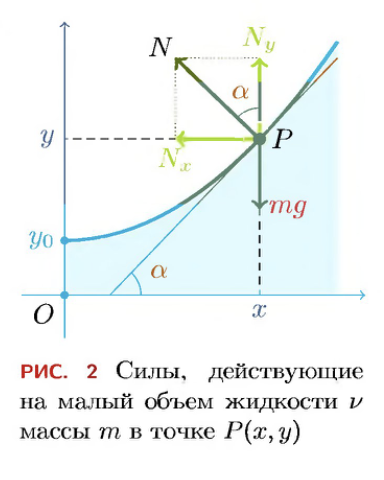


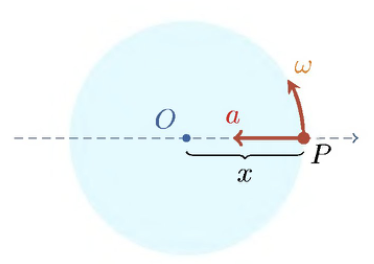

In [1359]:
from sympy import *
from IPython.display import display
from numpy import arange

In [1360]:
x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)

display(x, omega, y0, C1, g)

x

omega

y0

C1

g

Наше дифференциальное уравнение является простейшим, это значит, что оно решается непосредственным интегрированием его правой части.
Следовательно, для решения этого уравнения с помощью библиотеки `SymPy` нам достаточно определить только его правую часть, а не все уравнение целиком

In [1361]:
ode_rhs = omega ** 2 * x / g  # ordinary differential equation right-hand side

display(ode_rhs)

omega**2*x/g

Общее решение простейшего дифференциального уравнения `у = f(x)` - это неопределенный `интеграл` от правой части `f(х)` этого уравнения.

In [1362]:
dsol = integrate(ode_rhs, x) + C1
display(dsol)

C1 + omega**2*x**2/(2*g)

Стандартный способ определения константы интегрирования `С1` в общем решении дифференциального уравнения из начального условия заключается в подстановке в это решение величин из начального условия, что приводит к алгебраическому уравнению для переменной `С1`. Решив это уравнение и подставив найденное решение вместо `С1` обратно в формулу общего решения, мы найдем решение соответствующей начальной задачи для заданного дифференциального уравнения.

In [1363]:
eq1 = Eq(dsol.subs(x, 0), y0)

display(eq1)

Eq(C1, y0)

Следующим шагом решаем построенное уравнение с помощью команды

In [1364]:
sol1 = solveset(eq1, C1)
C2 = tuple(sol1)[0]

display(sol1, C2)

{y0}

y0

Последним действием подставляем найденное значение `С2` вместо символа `С1` в общее решение `dsol`, что и дает нам искомое решение начальной задачи.

In [1365]:
dsol_y0 = dsol.subs(C1, C2)

display(dsol_y0)

y0 + omega**2*x**2/(2*g)

Как видно из последней формулы, найденная зависимость высоты `у` поверхности жидкости от расстояния до оси вращения `x` оказывается квадратичной, т.е. интегральные кривые (графики решений дифференциального уравнения) должны быть параболами.

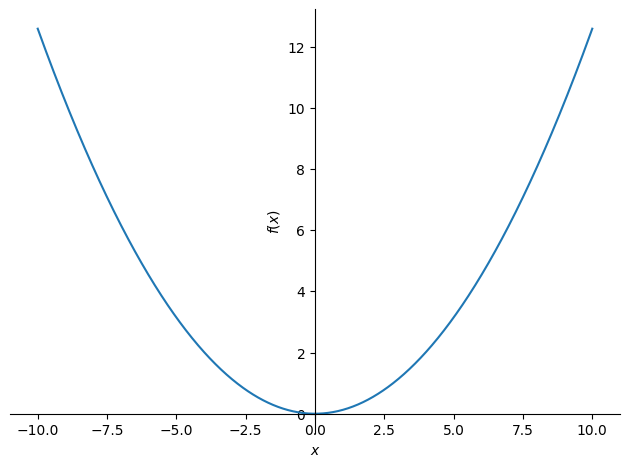

In [1366]:
ds = dsol_y0.subs({ y0: 0, omega: pi/2, g: 9.8 })
p1 = plot(ds)

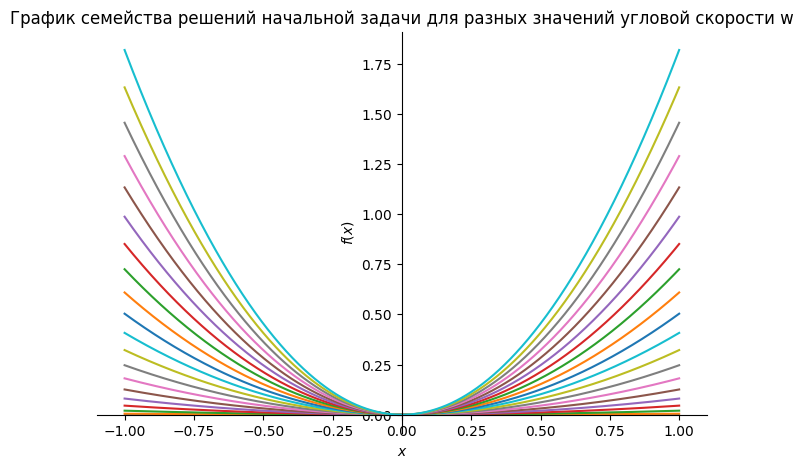

In [1367]:
p2 = plot(show=False, title="График семейства решений начальной задачи для разных значений угловой скорости w")

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_y0.subs({ y0: 0, omega: om, g: 9.8 })
  p = plot(ds, (x, -1, 1), show=False)
  p2.extend(p)

p2.show()

При построении графиков решения выше мы произвольно задавали значение параметра `у0` равным нулю. Более естественный подход к определению этого параметра заключается в вычислении объема вращающейся жидкости и учете очевидного условия, что этот объем является постоянной величиной, не зависящей от скорости вращения `w`.

In [1368]:
V0, R = symbols("V0 R")
vol = 2 * pi * integrate(dsol_y0 * x, (x, 0, R))
eq2 = Eq(V0, vol)

display(eq2)

Eq(V0, 2*pi*(R**4*omega**2/(8*g) + R**2*y0/2))

In [1369]:
sol2 = solveset(eq2, y0)
y1 = simplify(tuple(sol2)[0])

display(sol2, y1)

{-(R**4*omega**2/g - 4*V0/pi)/(4*R**2)}

-R**2*omega**2/(4*g) + V0/(pi*R**2)

In [1370]:
dsol_VO = dsol_y0.subs(y0, y1)

display(dsol_VO)

-R**2*omega**2/(4*g) + omega**2*x**2/(2*g) + V0/(pi*R**2)

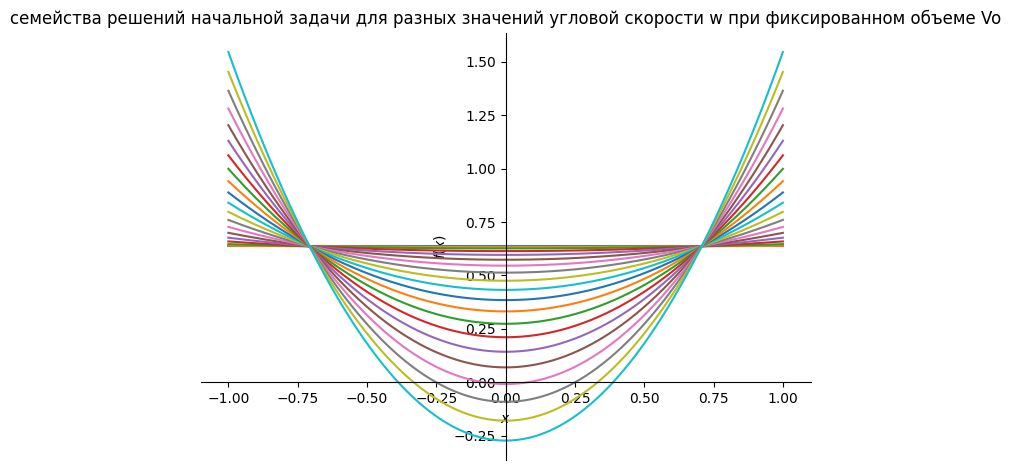

In [1371]:
p3 = plot(show=False, title="семейства решений начальной задачи для разных значений угловой скорости w при фиксированном объеме Vo")

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_VO.subs({ V0: 2, R: 1, omega: om, g: 9.8 })
  p = plot(ds, (x, -1, 1), show=False)
  p3.extend(p)

p3.show()

Видно, что поведение интегральных кривых теперь стало более естественным - нижняя точка парабалоида постепенно опускается при увеличении скорости вращения. Однако при достижении дна цилиндра `(y = 0)` это поведение становится нереалистичным - поверхность жидкости в некоторой области оказыва-ется ниже дна цилиндра, а интегрирование по этой области дает отрицательный объем. То есть наши выкладки справедливы только при условии, что кривая `у(х)` располагается строго над осью `Ох`.

In [1372]:
eq3 = Eq(dsol_VO.subs(x, 0), 0)
sol3 = solveset(eq3, omega)
omega0 = tuple(sol3)[1]

display(omega0)

2*sqrt(V0)*sqrt(g)/(sqrt(pi)*R**2)

In [1373]:
def draw_subcritical_case(gi):
  par = { V0: 2, omega: 0, R: 1, g: gi }
  om0 = omega0.subs(par)
  p4 = plot(ylim=(0, 1,5), show=False, title="График семейства решений начальной задачи в подкритическом случае")


  for om in arange(0, 1.1 * om0, 0.1 * om0):
    par['omega'] = om
    ds = dsol_VO.subs(par)
    p = plot(ds, (x, -1, 1), line_color = "skyblue", show = False)
    p4.extend(p)

  return p4


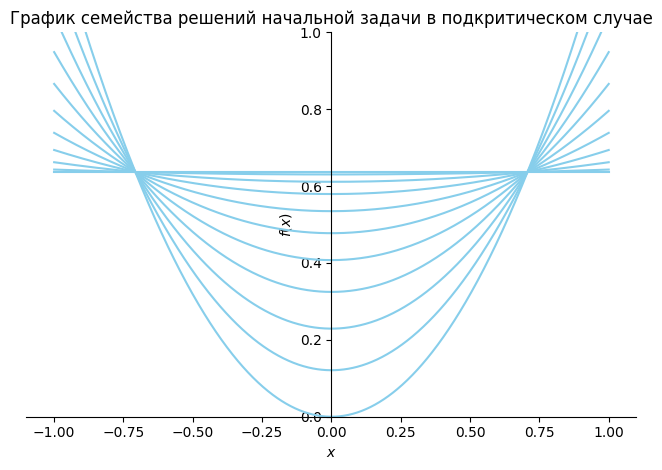

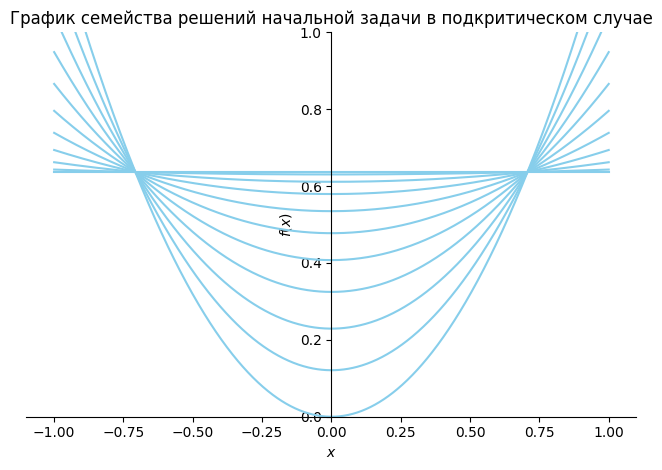

In [1374]:
p4 = draw_subcritical_case(9.8)
p4_123 = draw_subcritical_case(200)


p4.show()
p4_123.show()

In [1375]:
eq4 = Eq(dsol_y0, 0)
sol4 = solveset(eq4, x)
x0 = tuple(sol4)[0]

display(x0)

sqrt(2)*sqrt(g)*sqrt(-y0)/omega

In [1376]:
vol1 = 2 * pi * integrate(dsol_y0 * x, (x, x0, R))

display(vol1)

2*pi*(R**4*omega**2/(8*g) + R**2*y0/2 + g*y0**2/(2*omega**2))

In [1377]:
eq5 = Eq(vol1, V0)
sol5 = solveset(eq5, y0)
y2 = None

for s in tuple(sol5):
  res = s.subs(omega, omega0)

  if res == 0:
    y2 = s

dsol_sup = dsol_y0.subs(y0, y2)

display(dsol_sup)

-R**2*omega**2/(2*g) + sqrt(V0)*omega/(sqrt(pi)*sqrt(g)) + omega**2*x**2/(2*g)

In [1378]:
def draw_supercritical_case(gi):
  par = { V0: 2, omega: 0, R: 1, g: gi }
  om0 = omega0.subs(par)
  ylim_upper_bound = 0.3 * float(om0)
  p5 = plot(ylim=(0, ylim_upper_bound), show=False, title="График семейства решений начальной задачи в надкритическом случае")

  for om in arange(1.2 * om0, 3 * om0, 0.2 * om0):
    par[omega] = om
    ds = dsol_sup.subs(par)
    p = plot(ds, (x, -1, 1), line_color = "red", show = False)
    p5.extend(p)

  return p5

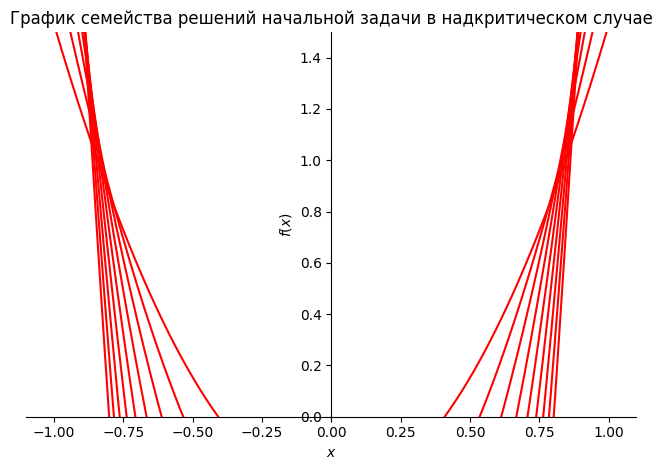

In [1379]:
p5 = draw_supercritical_case(9.8)

p5.show()

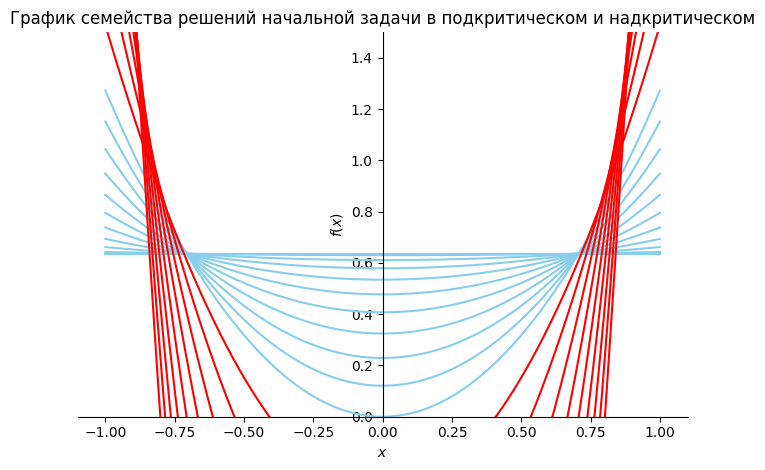

In [1380]:
p6 = plot(
    ylim=(0, 1.5),
    show=False,
    title="График семейства решений начальной задачи в подкритическом и надкритическом",
    )


p6.extend(p4)
p6.extend(p5)

p6.show()



## TASKS

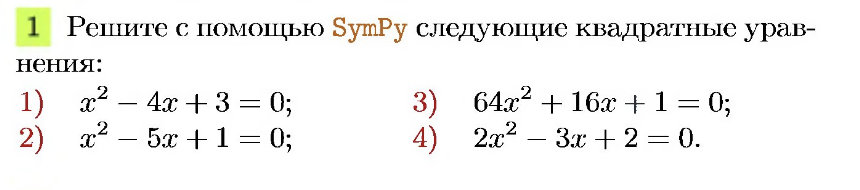

In [1381]:
x = symbols("x")

eq_1 = Eq((x**2 - 4*x + 3), 0)
eq_2 = Eq((x**2 - 5*x + 1), 0)
eq_3 = Eq((64*(x**2) + 16*x + 1), 0)
eq_4 = Eq((2*(x**2) - 3*x + 2), 0)

sol_eq_1 = solveset(eq_1)
sol_eq_2 = solveset(eq_2)
sol_eq_3 = solveset(eq_3)
sol_eq_4 = solveset(eq_4)


display(sol_eq_1, sol_eq_2, sol_eq_3, sol_eq_4)

{1, 3}

{5/2 - sqrt(21)/2, sqrt(21)/2 + 5/2}

{-1/8}

{3/4 - sqrt(7)*I/4, 3/4 + sqrt(7)*I/4}

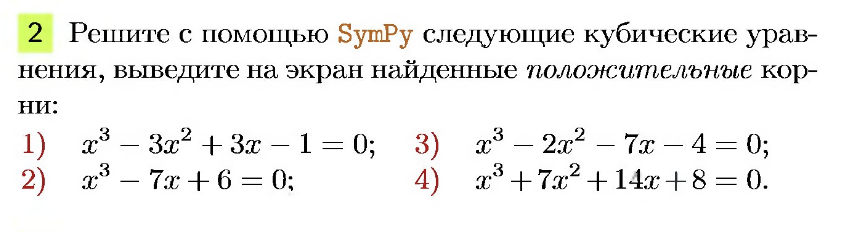

In [1382]:
x = symbols("x")

eq_1 = Eq((x**3 - 3*(x**2) + 3*x - 1), 0)
eq_2 = Eq((x**3 - 7*x + 6), 0)
eq_3 = Eq((x**3 - 2*(x**2) - 7*x - 4), 0)
eq_4 = Eq((x**3 + 7*(x**2) + 14*x + 8), 0)

sol_eq_1 = solveset(eq_1)
sol_eq_2 = solveset(eq_2)
sol_eq_3 = solveset(eq_3)
sol_eq_4 = solveset(eq_4)

pos_sol_eq_1 = [sol for sol in sol_eq_1 if sol > 0]
pos_sol_eq_2 = [sol for sol in sol_eq_2 if sol > 0]
pos_sol_eq_3 = [sol for sol in sol_eq_3 if sol > 0]
pos_sol_eq_4 = [sol for sol in sol_eq_4 if sol > 0]


display(pos_sol_eq_1, pos_sol_eq_2, pos_sol_eq_3, pos_sol_eq_4)

[1]

[1, 2]

[4]

[]

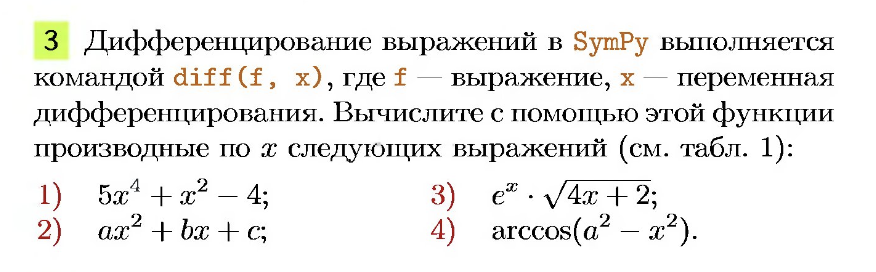

In [1383]:
x, a, b, c = symbols("x a b c")

fx_1 = 5*(x**4) + x**2 - 4
fx_2 = a*(x**2) + b*x + c
fx_3 = exp(x) * sqrt(4*x + 2)
fx_4 = acos(a**2 - x**2)

dfx_1 = diff(fx_1, x)
dfx_2 = diff(fx_2, x)
dfx_3 = diff(fx_3, x)
dfx_4 = diff(fx_4, x)


display(dfx_1, dfx_2, dfx_3, dfx_4)

20*x**3 + 2*x

2*a*x + b

sqrt(4*x + 2)*exp(x) + 2*exp(x)/sqrt(4*x + 2)

2*x/sqrt(1 - (a**2 - x**2)**2)

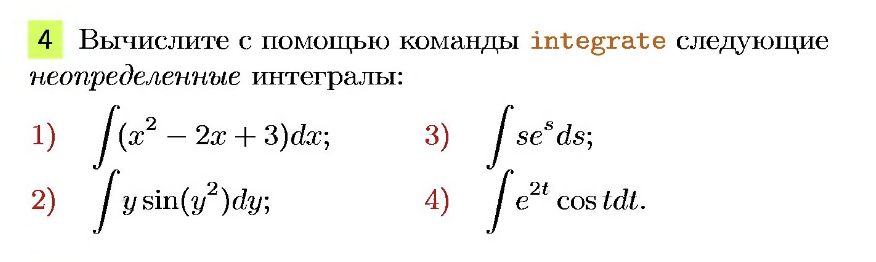



In [1384]:
x, y, s, t, C = symbols("x y s t C")

fx_1 = x**2 - 2*x + 3
fy_2 = y * sin(y**2)
fs_3 = s * exp(s)
ft_4 = exp(2*t) * cos(t)

int_fx_1 = integrate(fx_1, x) + C
int_fy_2 = integrate(fy_2, y) + C
int_fs_3 = integrate(fs_3, s) + C
int_ft_4 = integrate(ft_4, t) + C


display(int_fx_1, int_fy_2, int_fs_3, int_ft_4)

C + x**3/3 - x**2 + 3*x

C - cos(y**2)/2

C + (s - 1)*exp(s)

C + exp(2*t)*sin(t)/5 + 2*exp(2*t)*cos(t)/5

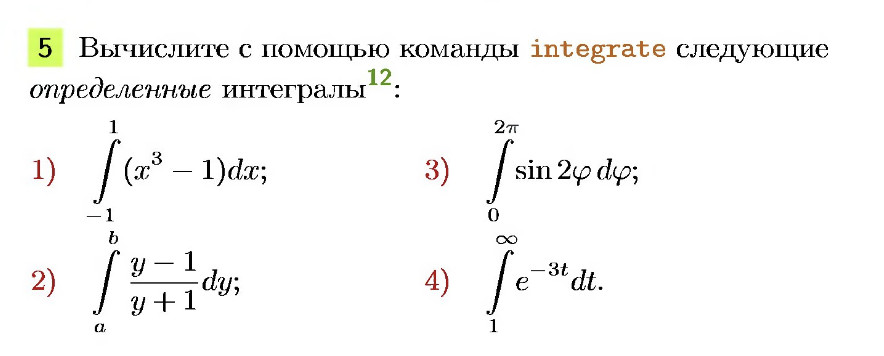

In [1385]:
x, y, a, b, gamma, s, t, C = symbols("x y a b gamma s t C")


fx_1 = x**3 - 1
fy_2 = (y - 1) / (y + 1)
fgamma_3 = sin(2 * gamma)
ft_4 = exp(-3*t)

int_fx_1 = integrate(fx_1, (x, -1, 1)) + C
int_fy_2 = integrate(fy_2, (y, a, b)) + C
int_fgamma_3 = integrate(fgamma_3, (gamma, 0, 2*pi)) + C
int_ft_4 = integrate(ft_4, (t, 0, oo)) + C


display(int_fx_1, int_fy_2, int_fgamma_3, int_ft_4)

C - 2

C - a + b + 2*log(a + 1) - 2*log(b + 1)

C

C + 1/3

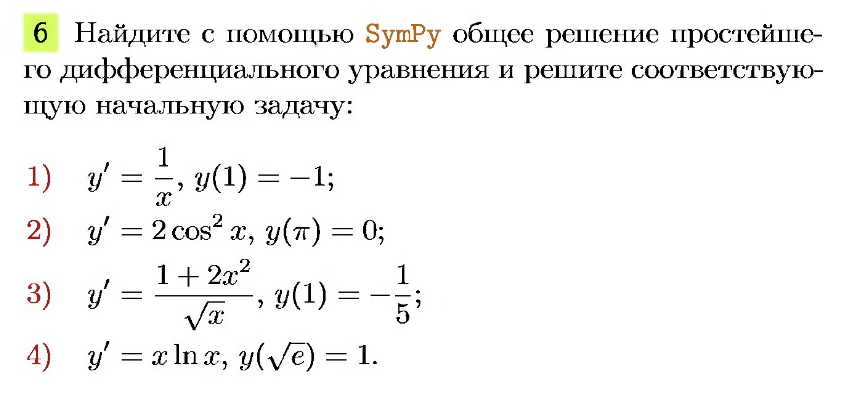

In [1386]:
x, y, y0, C = symbols("x y y0 C")

ode_rhs_1 = 1/x
dsol_1 = integrate(ode_rhs_1, x) + C
eq_1 = Eq(dsol_1, y0)
initial_condition = eq_1.subs({ x: 1, y0: -1 })
particular_solution = eq_1.subs({ C: -1 })

display(dsol_1, particular_solution)

C + log(x)

Eq(log(x) - 1, y0)

In [1387]:
x, y, C = symbols("x y C")

y = Function(y)(x)
ode_2 = Eq(y.diff(x), 2 * cos(x)**2)
dsol_2 = dsolve(ode_2, y)


initial_condition = Eq(dsol_2.rhs.subs(x, pi), 0)  # y(pi) = 0

C = solve(initial_condition)[0]

particular_solution = dsol_2.subs(C1, C)


display(dsol_2)
display(particular_solution)

Eq(y(x), C1 + x + sin(x)*cos(x))

Eq(y(x), x + sin(x)*cos(x) - pi)

In [1388]:
x, y, C = symbols("x y C")

y = Function(y)(x)
ode_3 = Eq(y.diff(x), (1 + 2*(x**2))/(sqrt(x)))
dsol_3 = dsolve(ode_3, y)

initial_condition = Eq(dsol_3.rhs.subs(x, 1), -(1/5))
C = solve(initial_condition)[0]
particular_solution = dsol_3.subs(C1, C)


display(dsol_3)
display(particular_solution)

Eq(y(x), C1 + 4*x**(5/2)/5 + 2*sqrt(x))

Eq(y(x), 4*x**(5/2)/5 + 2*sqrt(x) - 3.0)

In [1389]:
x, y, C = symbols("x y C")

y = Function(y)(x)
ode_4 = Eq(y.diff(x), (x * log(x)))
dsol_4 = dsolve(ode_4, y)

initial_condition = Eq(dsol_4.rhs.subs(x, sqrt(E)), 1)

C = solve(initial_condition)[0]
particular_solution = dsol_4.subs(C1, C)


display(dsol_4)
display(particular_solution)

Eq(y(x), C1 + x**2*log(x)/2 - x**2/4)

Eq(y(x), x**2*log(x)/2 - x**2/4 + 1)

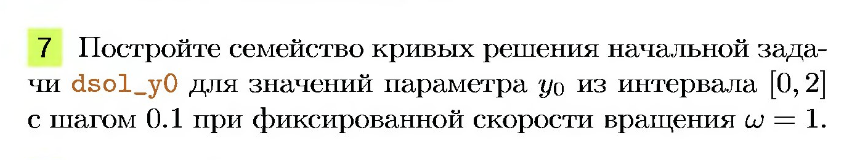

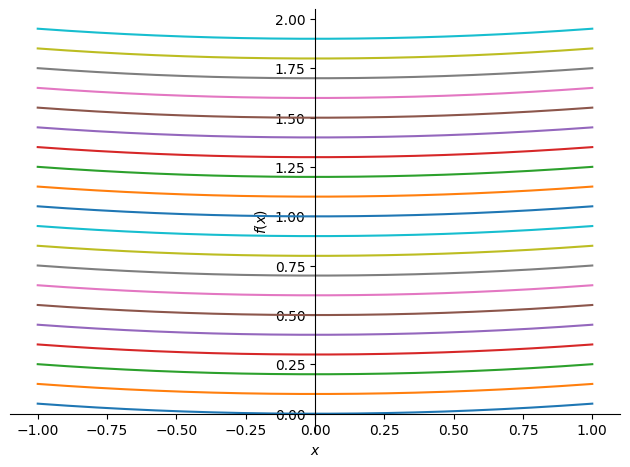

In [1390]:
p = plot(show=False)

for y in arange(0, 2, 0.1):
  ds = dsol_y0.subs({ y0: y, omega: 1, g: 9.8 })
  p_tmp = plot(ds, (x, -1, 1), show=False)
  p.extend(p_tmp)

p.show()

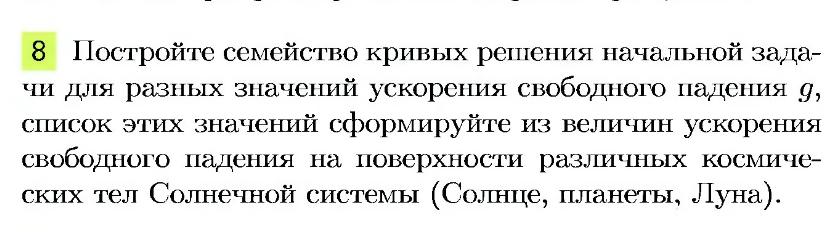

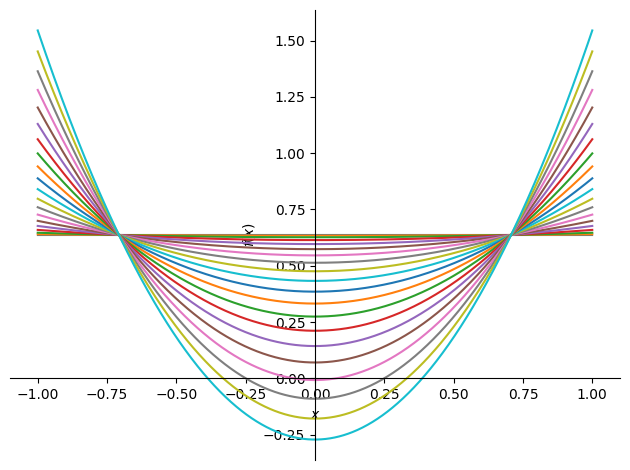

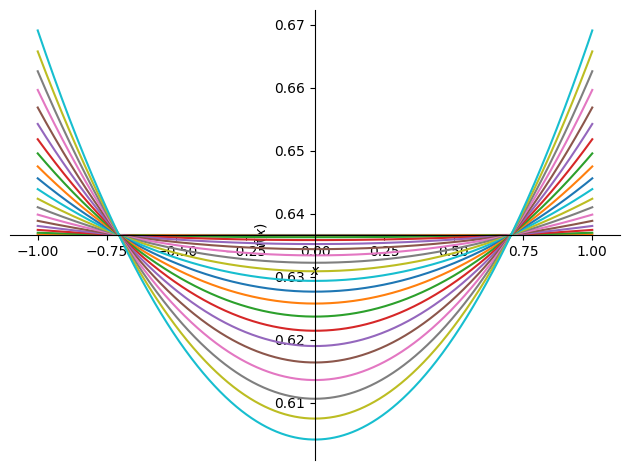

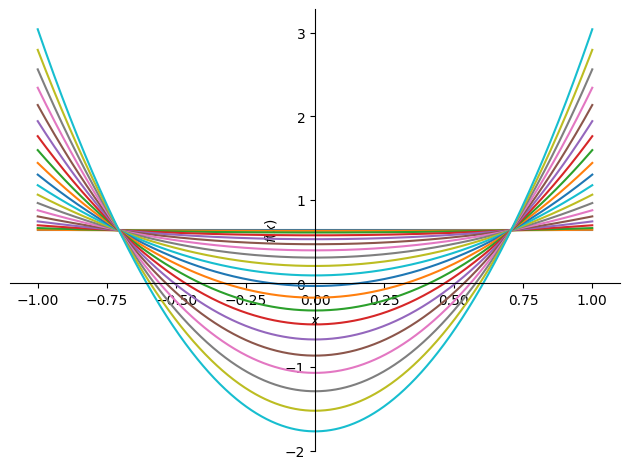

In [1392]:
gi = {
    'sun': 274.1,
    'mercury': 3.7,
    'venus': 8.9,
    'earth': 9.8,
    'mars': 3.7,
    'jupiter': 25.9,
    'saturn': 11.2,
    'uranus': 9,
    'neptune': 11.3,
}


p = plot(show=False)

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_VO.subs({ V0: 2, R: 1, omega: om, g: gi['earth'] })
  p_tmp = plot(ds, (x, -1, 1), show=False)
  p.extend(p_tmp)

p.show()

p = plot(show=False)

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_VO.subs({ V0: 2, R: 1, omega: om, g: gi['sun'] })
  p_tmp = plot(ds, (x, -1, 1), show=False)
  p.extend(p_tmp)

p.show()

p = plot(show=False)

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_VO.subs({ V0: 2, R: 1, omega: om, g: gi['mars'] })
  p_tmp = plot(ds, (x, -1, 1), show=False)
  p.extend(p_tmp)

p.show()

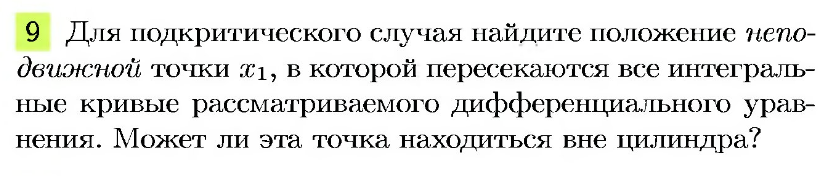

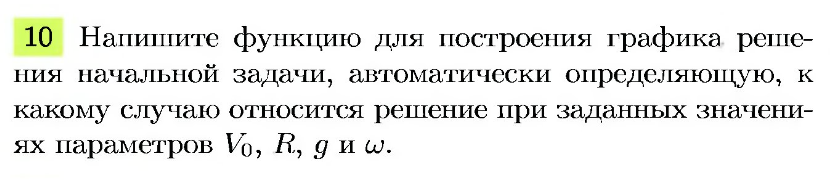

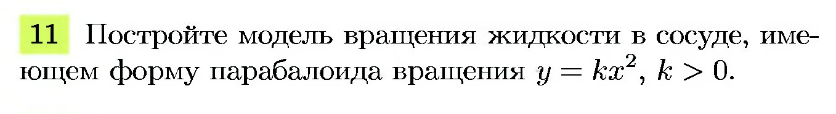

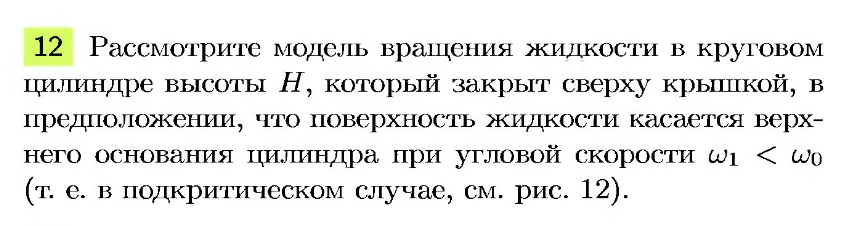

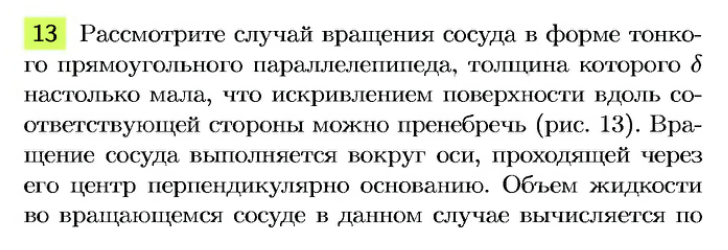

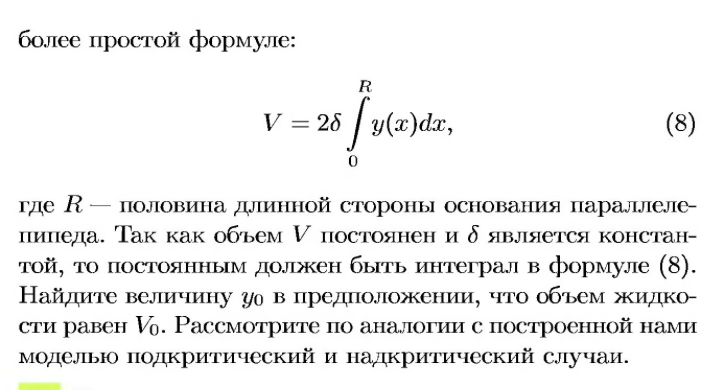

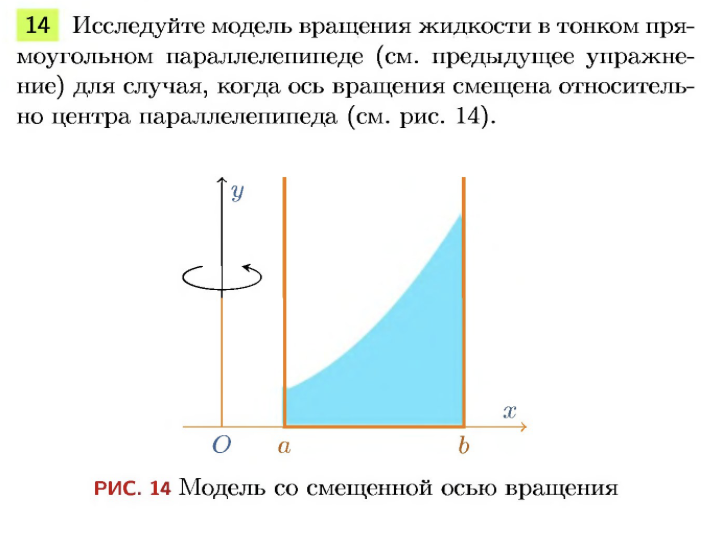